In [9]:
import json
import os

review=[]
with open('../../hduser1/Yelp/review.json') as json_file:
    for line in json_file:
        review.append(json.loads(line))
len(review)

4153150

In [10]:
users=[]
with open('../../hduser1/Yelp/user.json') as json_file:
    for line in json_file:
        users.append(json.loads(line))
len(users)

tips=[]
with open('../../hduser1/Yelp/tip.json') as json_file:
    for line in json_file:
        tips.append(json.loads(line))
len(tips)

business=[]
with open('../../hduser1/Yelp/business.json') as json_file:
    for line in json_file:
        business.append(json.loads(line))
len(business)

144072

In [11]:
tips[1]

{u'business_id': u'jH19V2I9fIslnNhDzPmdkA',
 u'date': u'2015-08-12',
 u'likes': 0,
 u'text': u'Great breakfast large portions and friendly waitress. I highly recommend it',
 u'type': u'tip',
 u'user_id': u'ZcLKXikTHYOnYt5VYRO5sg'}

In [13]:
import pandas as pd
dates = []
for t in tips:
    dates.append(t['date'])
df_dates = pd.DataFrame({'date': pd.Series(dates)})
df_dates.head()

,date
0,2012-07-15
1,2015-08-12
2,2014-06-20
3,2016-10-12
4,2016-07-03


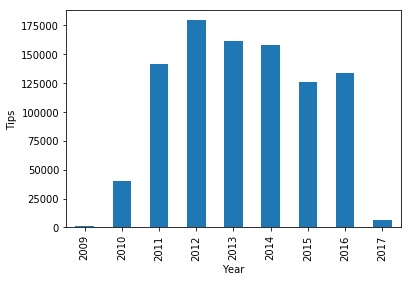

In [14]:
import matplotlib.pyplot as plt
# Year vs amount of tips
plt.close()
df_dates['date'].groupby(df_dates['date'].astype("datetime64").dt.year).count().plot(kind="bar")
plt.xlabel('Year')
plt.ylabel('Tips')
plt.show()

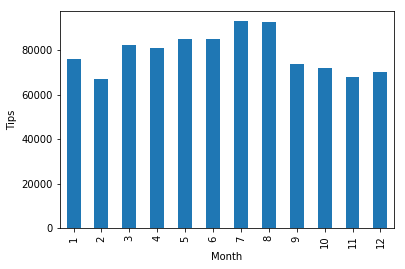

In [15]:
# Month vs amount of tips
plt.close()
df_dates['date'].groupby(df_dates['date'].astype("datetime64").dt.month).count().plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Tips')
plt.show()

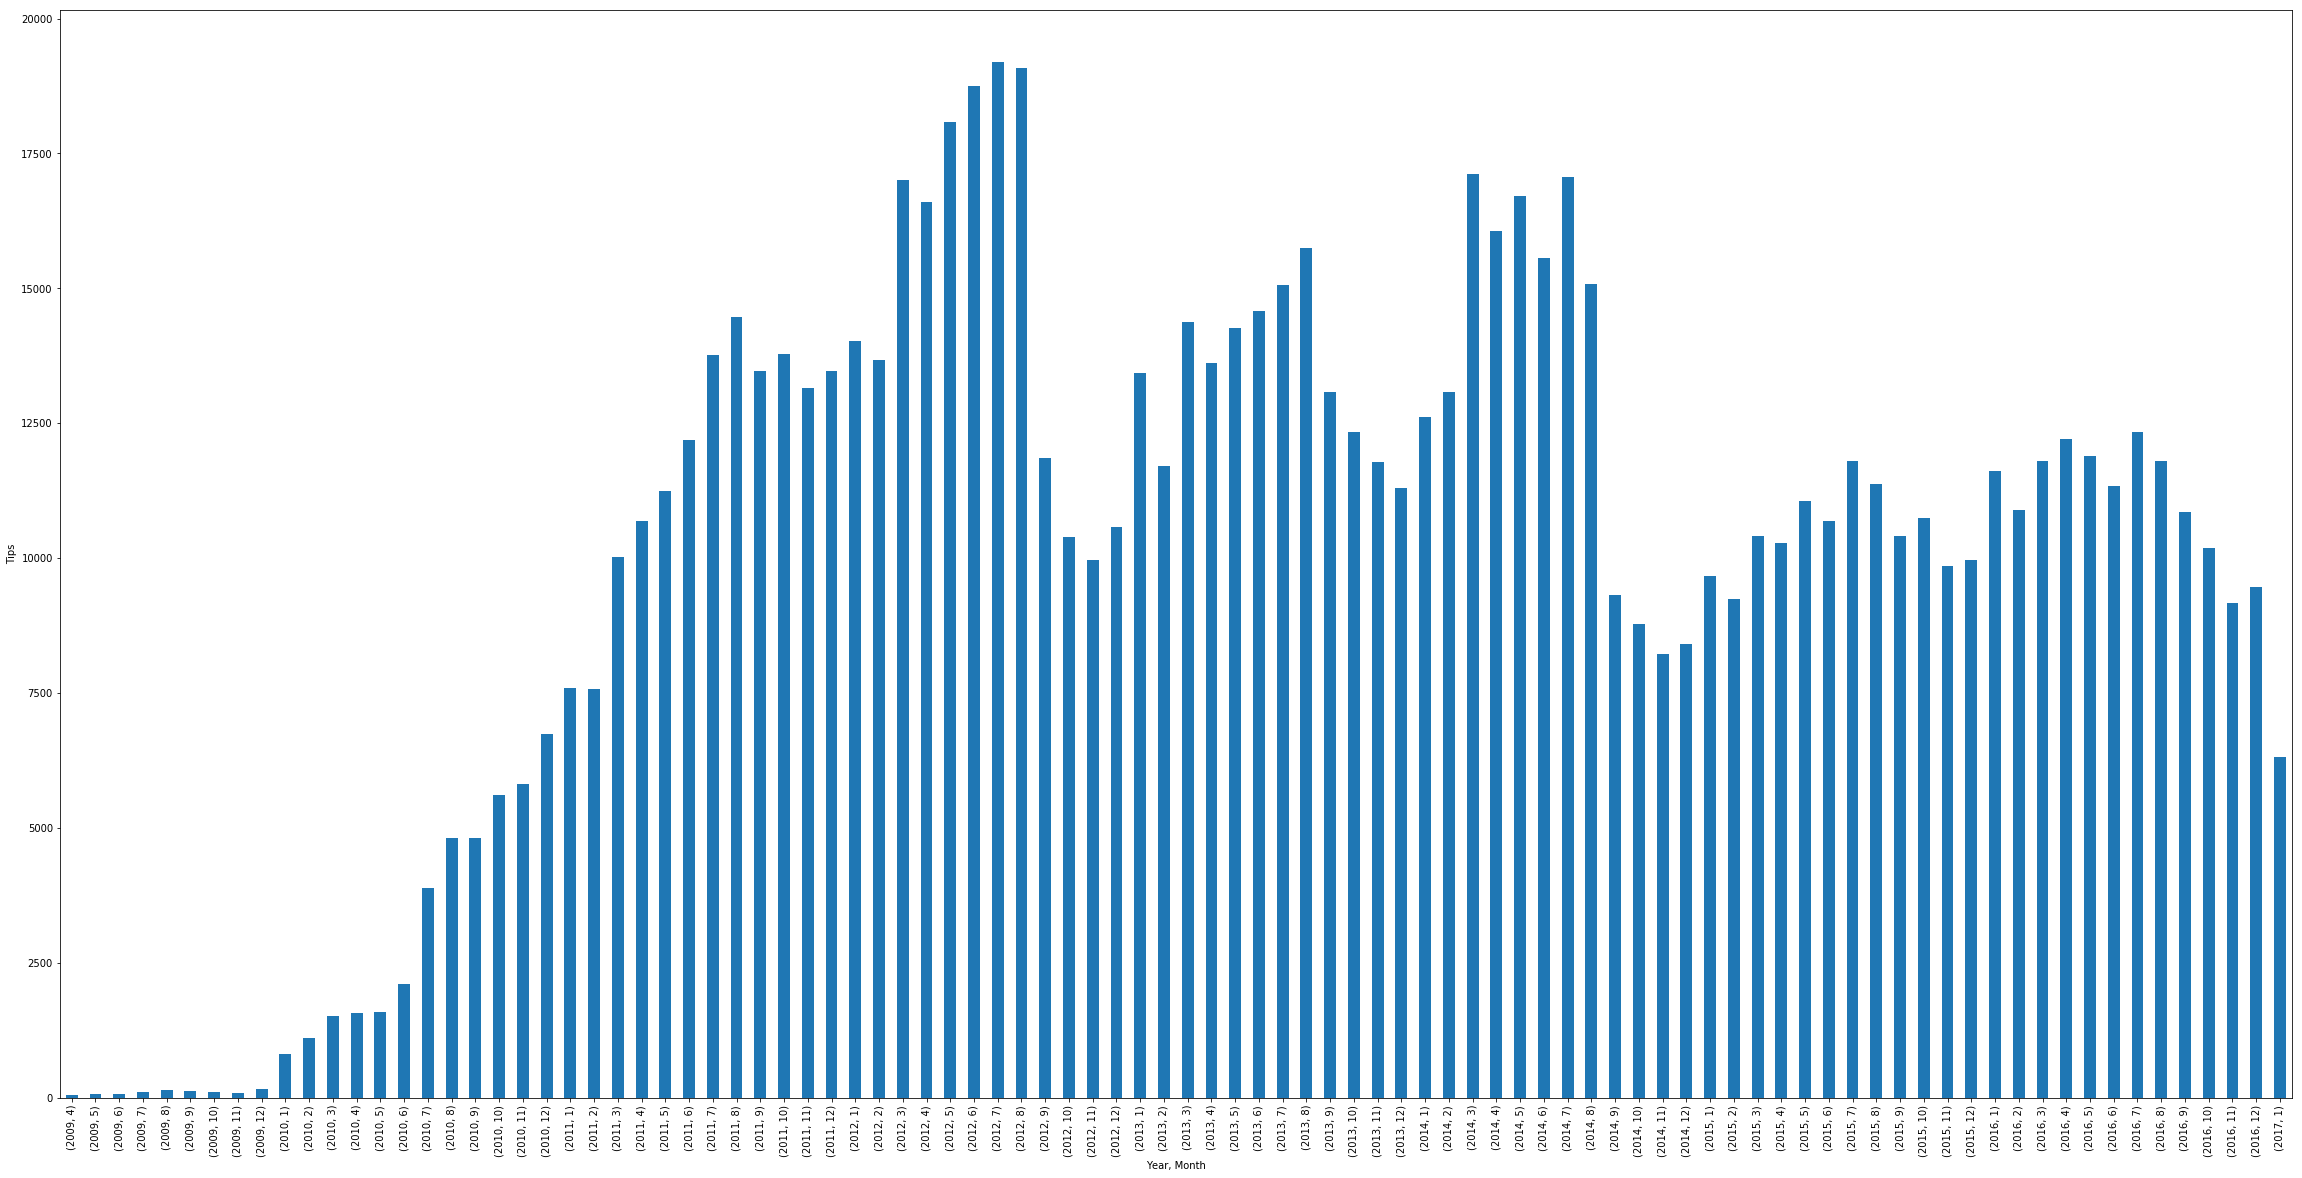

In [16]:
# Year vs amount of new users
plt.close()
plt.figure(figsize= (40,20))
df_dates['date'].groupby([df_dates['date'].astype("datetime64").dt.year, df_dates['date'].astype("datetime64").dt.month]).count().plot(kind="bar")
plt.xlabel('Year, Month')
plt.ylabel('Tips')
plt.savefig('graph1.png')
plt.show()

In [17]:
freq = df_dates['date'].groupby([df_dates['date'].astype("datetime64").dt.year, df_dates['date'].astype("datetime64").dt.month]).count().values
# normalize data
from sklearn import preprocessing
freq_l2 = preprocessing.normalize(freq.reshape(1,-1), norm='l2')
freq_l1 = preprocessing.normalize(freq.reshape(1,-1), norm='l1')
freq_max = preprocessing.normalize(freq.reshape(1,-1), norm='max')

ImportError: No module named sklearn

In [18]:
# new data frame
time = []
votes = []
for t in tips:
    votes.append(t['likes'])
    time.append(t['date'])

votes_df = pd.DataFrame({'likes':pd.Series(votes), 'date':pd.Series(time)})

In [19]:
import numpy as np
votes_df.head()
np.mean(votes)

0.016906824424255229

In [20]:
# Time vs amount of votes

votes_df.groupby([votes_df['date'].astype("datetime64").dt.year, 
                          votes_df['date'].astype("datetime64").dt.month]).head()
tips[0].keys()

[u'user_id', u'text', u'business_id', u'likes', u'date', u'type']

In [21]:
count = 0
non_zero = []
for t in tips:
    if int(t['likes']) == 0:
        count += 1
    else:
        non_zero.append(t)
count

932278

In [22]:
likes_array = []
for n in non_zero:
    likes_array.append(int(n['likes']))
np.mean(likes_array)

1.1174416980868593

In [23]:
# convert tips into a dataframe
user_id = []
text = []
business_id = []
date = []
likes = []

for t in tips:
    user_id.append(t['user_id'])
    text.append(t['text'])
    business_id.append(t['business_id'])
    date.append(t['date'])
    likes.append(t['likes'])

tips_df = pd.DataFrame({'user_id':pd.Series(user_id), 
                        'date':pd.Series(date), 
                        'text':pd.Series(text),
                        'likes':pd.Series(likes),
                        'business_id':pd.Series(business_id)})
tips_df.sort_values(['likes'], ascending = False).head()

,business_id,date,likes,text,user_id
247955,gwdQwe1JHLe-vPY9PjKOUg,2016-11-15,15,My kitty Rocky is so very sick with osteosarco...,wTfb2nfzPIyFcYQArdPtuQ
247935,Rrzm4bQDrrUnDyA5eRY3KQ,2016-09-14,12,1st Pet was very kind in regards to helping wi...,wTfb2nfzPIyFcYQArdPtuQ
470436,j7zJxmr8BfYJhC3KW9BshA,2015-09-17,11,License photographer assured me her photos alw...,8DEyKVyplnOcSKx39vatbg
383619,QJ6GXAAMkgCZPF0bZk0xLw,2015-06-18,9,Heads up.... The sweet older couple who owned ...,Fv0e9RIV9jw5TX3ctA1WbA
825240,-PABBD9nMgAYZHSShqGsjg,2014-06-08,7,Don't plan on coming here unless you have at l...,znyfmA7kGcyG3YxkpHCA6Q


In [24]:
print(tips_df.sort_values(['likes'], ascending = False)['text'][247935])
tips_df.groupby('user_id').sum().sort_values(['likes'], ascending = False).head()

1st Pet was very kind in regards to helping with my best boy doggy Clopi's last minutes. RIP Clopi ~ Mommy loves you forever...


,likes
user_id,
mkbx55W8B8aPLgDqex7qgg,733
A0j21z2Q1HGic7jW6e9h7A,145
0tvCcnfJnSs55iB6mqPk3w,134
R5WcogaoAwjdHxrB2v5NsQ,110
2EuPAGalYnP7eSxPgFCNDg,108


In [25]:
likes_sum = tips_df.groupby('user_id').sum().sort_values(['likes'], ascending = False)

In [26]:
user_tips = likes_sum.index.values
sum_like = likes_sum.values.reshape(-1)

In [27]:
user_dict = {}
count = 0
for u in users:
    user_dict[u['user_id']] = count
    count += 1

In [86]:
is_elite = []
for ut in user_tips:
    index = user_dict[ut]
    if (users[index]['elite'][0] == 'None'):
        is_elite.append(False)
    else:
        is_elite.append(True)

In [102]:
# create a dataframe with elite field
user_tips_df = pd.DataFrame({'user_id':pd.Series(user_tips), 
                        'sum_like':pd.Series(sum_like), 
                        'is_elite':pd.Series(is_elite),})

In [104]:
user_tips_df.tail()

,is_elite,sum_like,user_id
212045,True,0,KfuV9a5luWIFoJxphLrQxQ
212046,False,0,KfvNqHWjrr0k9tE3sKTrOA
212047,False,0,Kfvx6c6PbyXDO_FfHbYdyw
212048,False,0,KfznHOCjmMBP-fYsRgmiXA
212049,False,0,zzyzP--p98zZtx359NvgGA


In [105]:
total_tips = tips_df.groupby('user_id').count().sort_values(['likes'], ascending = False)
tips_v = total_tips.values[:,0]
user_idv = total_tips.index.values

In [106]:
user_total_tips= {}
for i in range(len(tips_v)):
    user_total_tips[user_idv[i]] = tips_v[i]

In [107]:
user_v_ttips = []
for u in user_tips_df['user_id']:
    user_v_ttips.append(user_total_tips[u])
user_tips_df['total'] = pd.Series(user_v_ttips)
user_tips_df.head()

,is_elite,sum_like,user_id,total
0,False,733,mkbx55W8B8aPLgDqex7qgg,1447
1,True,145,A0j21z2Q1HGic7jW6e9h7A,868
2,True,134,0tvCcnfJnSs55iB6mqPk3w,992
3,True,110,R5WcogaoAwjdHxrB2v5NsQ,352
4,True,108,2EuPAGalYnP7eSxPgFCNDg,970


In [ ]:
def helper(x):
    if x:
        return 'red'
    else:
        return 'blue'
color = map(helper, user_tips_df['is_elite'])
plt.scatter(user_tips_df['total'][1:], user_tips_df['sum_like'][1:], c=color[1:], alpha=0.5)
plt.show()

,is_elite,sum_like,user_id,total
1,True,145,A0j21z2Q1HGic7jW6e9h7A,868
2,True,134,0tvCcnfJnSs55iB6mqPk3w,992
3,True,110,R5WcogaoAwjdHxrB2v5NsQ,352
4,True,108,2EuPAGalYnP7eSxPgFCNDg,970
5,True,102,eZfHm0qI8A_HfvXScwIYsg,1207
6,True,96,Fv0e9RIV9jw5TX3ctA1WbA,226
7,True,89,0FMte0z-repSVWSJ_BaQTg,870
8,True,88,3nDUQBjKyVor5wV0reJChg,923
9,True,86,CxDOIDnH8gp9KXzpBHJYXw,1337
10,True,85,u_wqt9RshdZsoj8ikLqoEQ,367
